# Final Model Evaluation on Unseen Test Data 

This notebook evaluates all the tuned models on the test dataset.

## 1. Import Libraries

In [2]:
import joblib 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## 2. Load Data and Model

In [4]:
# Load the processed data
try:
    test_df= pd.read_csv('../data/processed/cleaned_test_data.csv')
    print("Processed data loaded successfully.")
except FileNotFoundError:
    print("Error: '../data/processed/cleaned_test_data.csv' not found.")
    print("Please ensure you have run the model_training script first.")

# Tuned models to evaluate
models_to_evaluate = {
    "Logistic Regression": "../models/tuned/logistic_regression.pkl",
    "KNN": "../models/tuned/knn.pkl",
    "SVM": "../models/tuned/svm.pkl",
    "Naive Bayes": "../models/tuned/naive_bayes.pkl",
    "Decision Tree": "../models/tuned/decision_tree.pkl",
    "Random Forest": "../models/tuned/random_forest.pkl",
    "Gradient Boosting": "../models/tuned/gradient_boosting.pkl",
    "XGBoost": "../models/tuned/xgboost.pkl"
}

Processed data loaded successfully.


## 3. Prepare the Data

In [6]:
X_test= test_df.drop('target', axis=1)
y_test= test_df['target']

print(f"Test set feature shape: {X_test.shape}")
print(f"Test set target shape: {y_test.shape}")

Test set feature shape: (205, 21)
Test set target shape: (205,)


## 4. Evaluation And Prediction

### Logistic Regression Prediction


--- Evaluating Logistic Regression ---
Accuracy: 0.9073
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.90      0.92      0.91       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



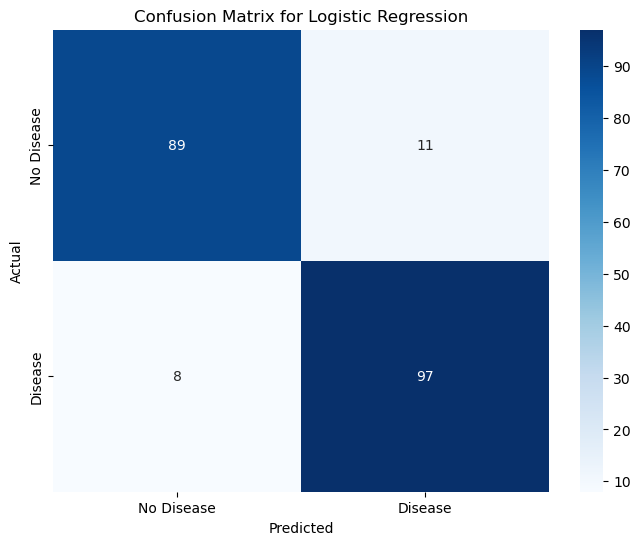

AUC Score: 0.9446


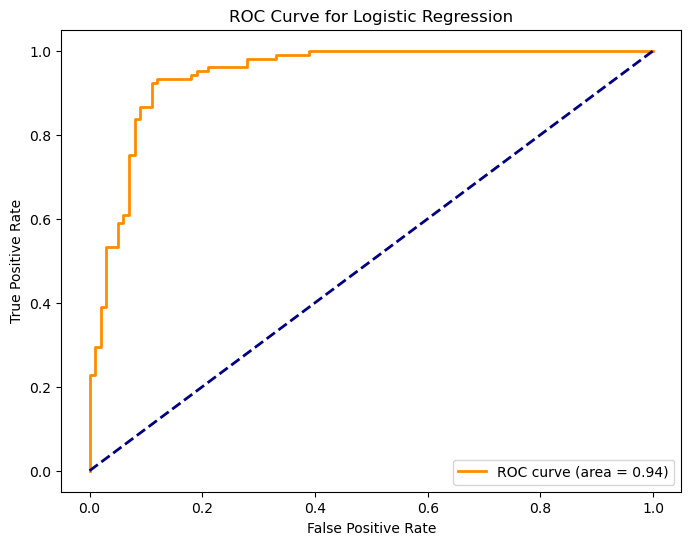

In [8]:
# Evaluating Logistic Regression
model_name = "Logistic Regression"
model_path = "../models/tuned/logistic_regression.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Ploting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Ploting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### K-Nearest Neighbors Prediction


--- Evaluating KNN ---
Accuracy: 0.9561
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       100
           1       0.97      0.94      0.96       105

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



C:\Users\praja\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\praja\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\praja\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\praja\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\praja\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

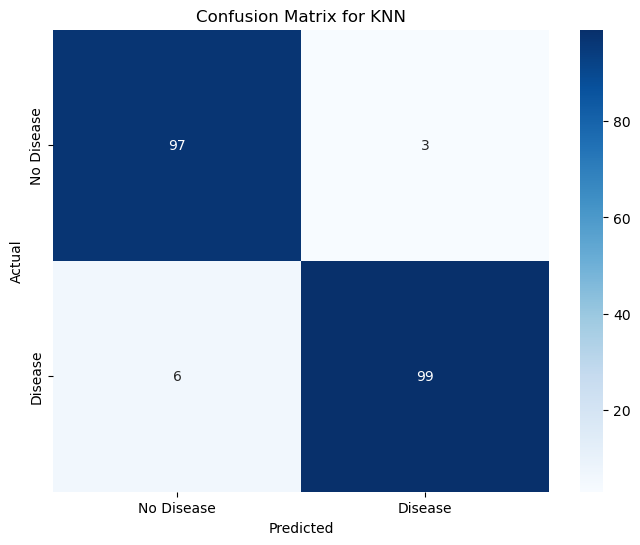

AUC Score: 0.9962


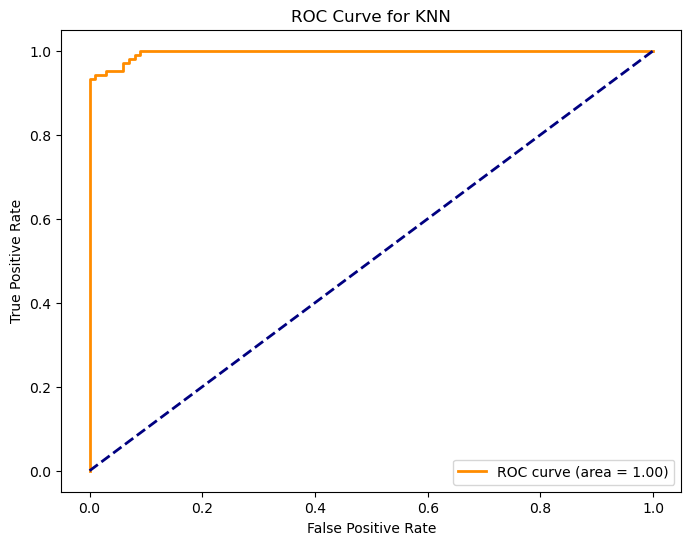

In [10]:
# Evaluating K-Nearest Neighbors
model_name = "KNN"
model_path = "../models/tuned/knn.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Support Vector Machine Prediction


--- Evaluating SVM ---
Accuracy: 0.8683
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       100
           1       0.84      0.92      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



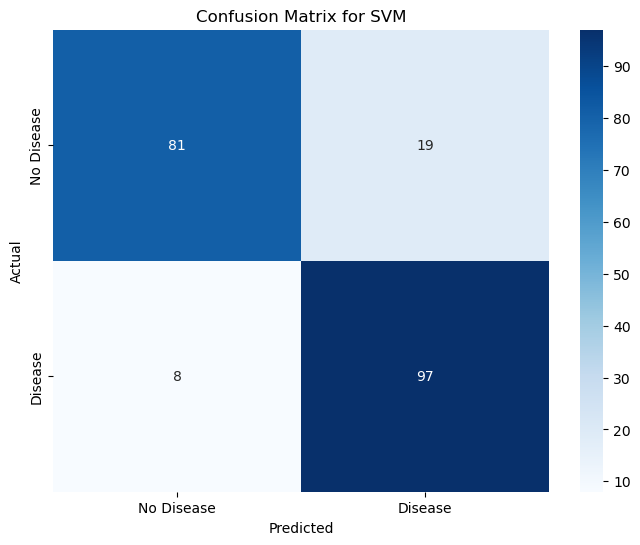

In [12]:
# Evaluating Support Vector Machine
model_name = "SVM"
model_path = "../models/tuned/svm.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Naive Bayes Prediction


--- Evaluating Naive Bayes ---
Accuracy: 0.8585
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       100
           1       0.86      0.87      0.86       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



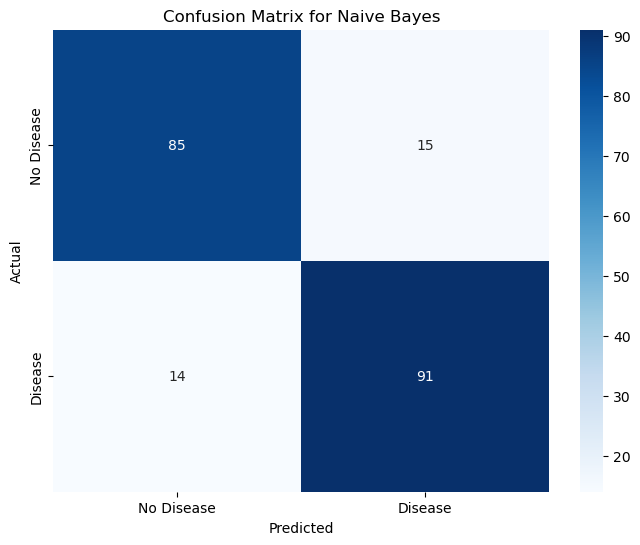

AUC Score: 0.9110


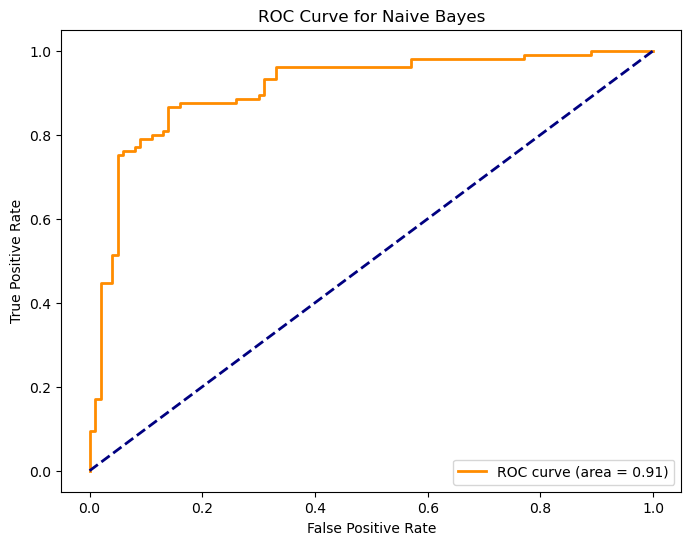

In [14]:
# Evaluating Naive Bayes
model_name = "Naive Bayes"
model_path = "../models/tuned/naive_bayes.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Decision Tree Prediction


--- Evaluating Decision Tree ---
Accuracy: 0.9415
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.95      0.93      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



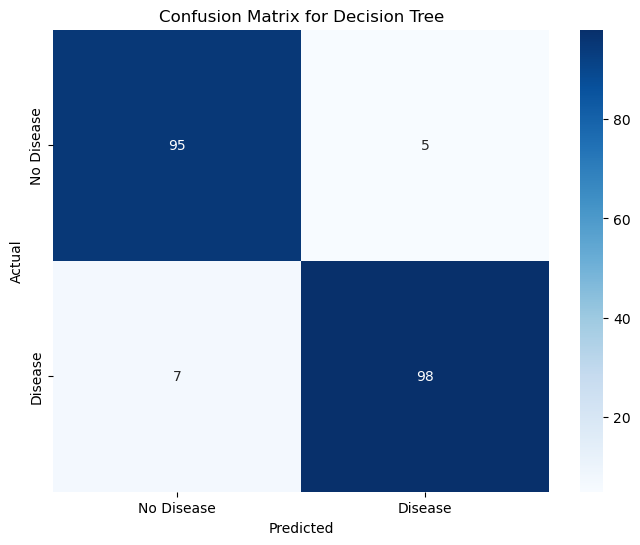

AUC Score: 0.9651


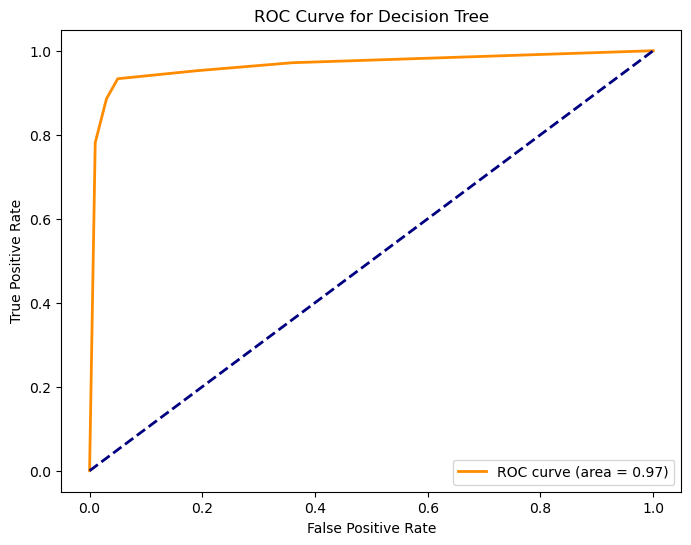

In [16]:
# Evaluating Decision Tree
model_name = "Decision Tree"
model_path = "../models/tuned/decision_tree.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Random Forest Prediction


--- Evaluating Random Forest ---
Accuracy: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       100
           1       0.95      0.95      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



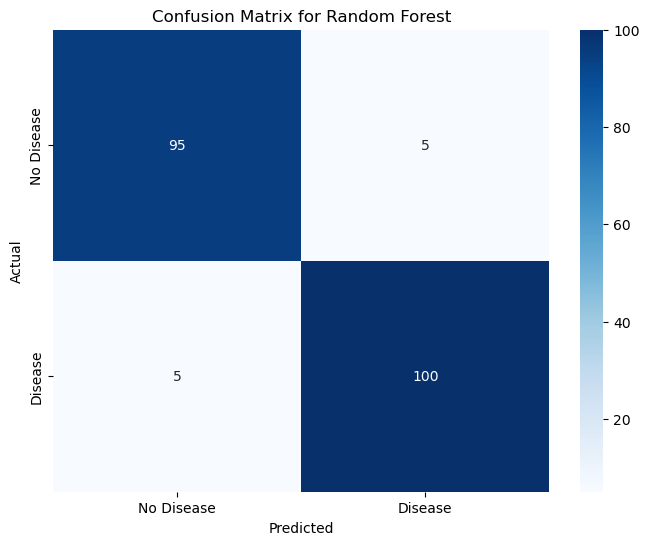

AUC Score: 0.9900


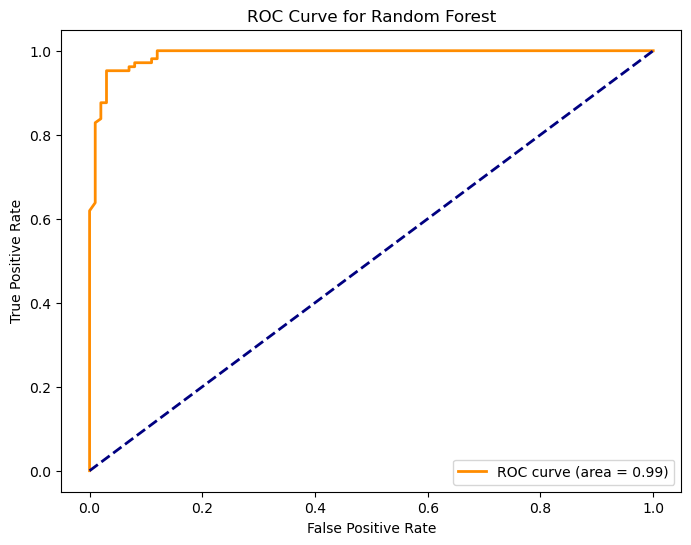

In [18]:
# Evaluating Random Forest
model_name = "Random Forest"
model_path = "../models/tuned/random_forest.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### Gradient Boosting Prediction


--- Evaluating Gradient Boosting ---
Accuracy: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       100
           1       0.95      0.95      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



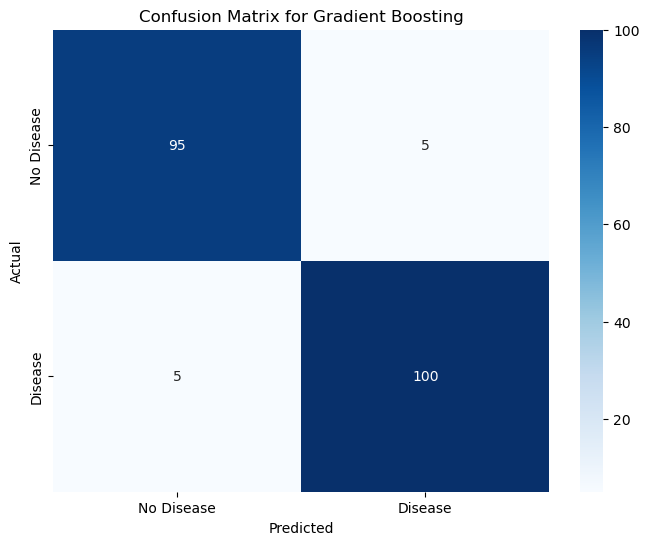

AUC Score: 0.9837


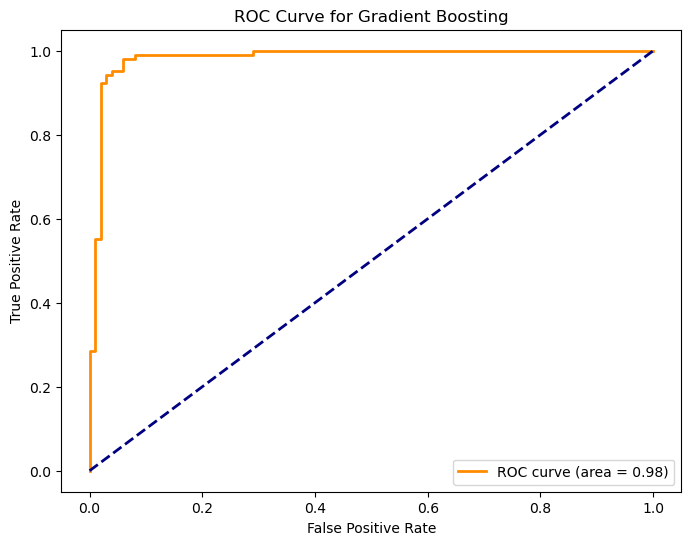

In [20]:
# Evaluating Gradient Boosting
model_name = "Gradient Boosting"
model_path = "../models/tuned/gradient_boosting.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

### XGBoost Prediction


--- Evaluating XGBoost ---
Accuracy: 0.9415
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       100
           1       0.94      0.94      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



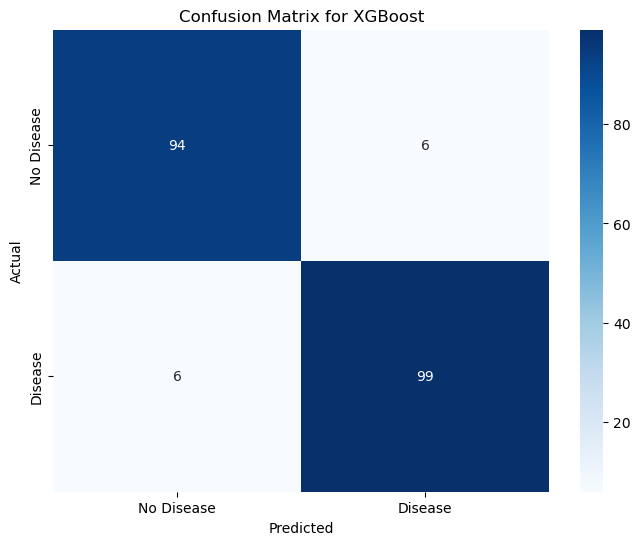

AUC Score: 0.9744


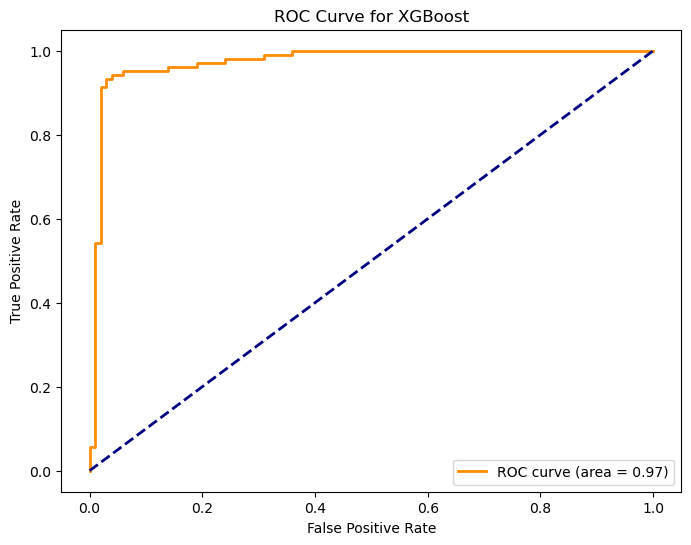

In [22]:
# Evaluating XGBoost
model_name = "XGBoost"
model_path = "../models/tuned/xgboost.pkl"

try:
    model = joblib.load(model_path)
    print(f"\n--- Evaluating {model_name} ---")
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plotting Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Plotting ROC Curve
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print(f"AUC Score: {roc_auc:.4f}")
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.title(f'ROC Curve for {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()

except FileNotFoundError:
    print(f"Error: '{model_path}' not found. Skipping {model_name}.")

## 5. Conclusion

The final evaluation of all hyper-tuned models on the unseen test data confirms the effectiveness of the training and tuning process. The K-Nearest Neighbors (KNN) model demonstrated superior performance, achieving the highest accuracy of 0.9561 and an exceptional AUC score of 0.9962. This result indicates that the model is highly robust and has a strong ability to correctly classify patients with and without heart disease. Its high performance on a completely unseen dataset validates its readiness for use in a real-world prediction pipeline, providing reliable and accurate insights.